<img src="./logo_UTN.svg" align="right" width="150" /> 

# Procesamiento Digital de Señales

## TS6

### Adrián Pablo Cafa
 



1) Implemente las funciones para generar las siguientes ventanas w(k):

Bartlett ó triangular
Hann
Blackman
Flat-top
Ayuda: Puede consultar el capítulo 7.3 del mismo libro para obtener las expresiones analíticas de cada ventana.

a) Para cada ventana grafique w(k) y |W(Ω)|, para N = 1000 muestras, normalizando w(k) de forma tal que la amplitud máxima de |W(Ω)| (lóbulo principal) sea 0 dB.

Ayuda: Posiblemente convenga utilizar zero-padding para visualizar mejor |W(Ω)|.

b) Construya una tabla en la que figuren dos mediciones de la anchura del lóbulo principal de cada ventana:

Ω0 será la frecuencia del primer cruce por cero, es decir |W(Ω)| =0 y 
Ω1, aquella frecuencia tal que |W(Ω1)|=2√2∨−3 dB y 
el valor de transferencia máxima de los lóbulos secundarios (expresado en dB)
W2=max{|W(Ω)|},  ∀ Ω≥Ω0


Sugerencia: Normalice Ω0,1 por Δf=fS√N para facilitar la comparación.

Descripción de las ventanas
 
 
Ω0	Ω1	 W2
Rectangular	 	 	 
Bartlett	 	 	 
Hann	 	 	 
Blackman	 	 	 
Flat-top	 	 	 

In [25]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 15 22:12:36 2021

@author: ADRIAN CAFA
"""
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.stats as stats
import matplotlib.patches as mpatches
from scipy.fft import *
mpl.rcParams['figure.figsize'] = (12,13)

In [6]:
N = 1000
Npad = 10 * N
fs = 1000
f = np.linspace(0, (N-1)*(fs/N), N)
f_pad = np.linspace(0, (Npad-1)*(fs/(Npad)), Npad)
t_pad = np.linspace(0, (Npad-1)/fs, Npad)
t = np.linspace(0, (N-1)/fs, N)

### Rectangular

$w[k] = \text{rect}_N[k]$ tiene en cuenta todas las muestras con el mismo peso. El lóbulo principal de su espectro de magnitud es estrecho, pero el nivel de los lóbulos laterales es bastante alto. Tiene la mayor selectividad de frecuencias.

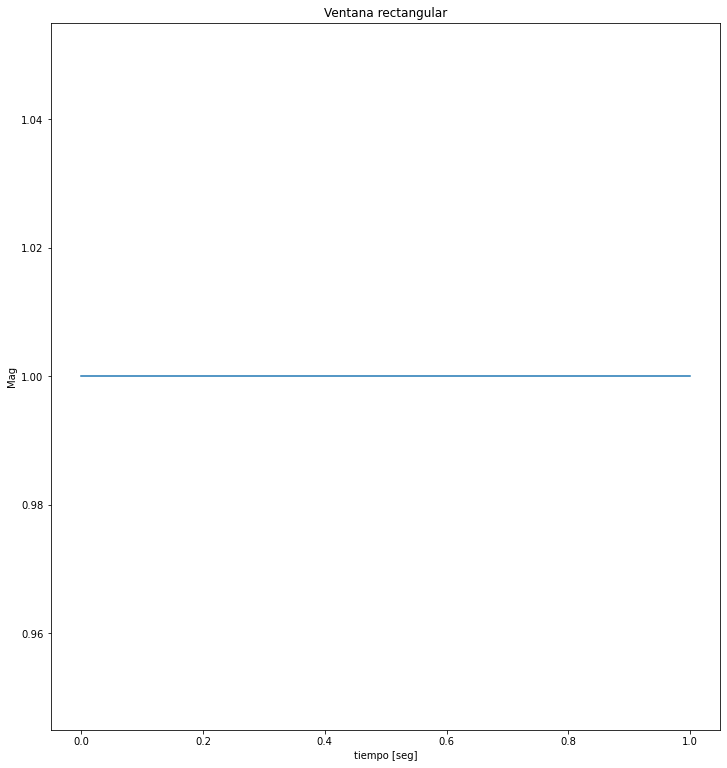

<ipython-input-7-0a8ee366732e>:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(box_fft),':x', lw=2, label='$ k0 = $' + 'box')


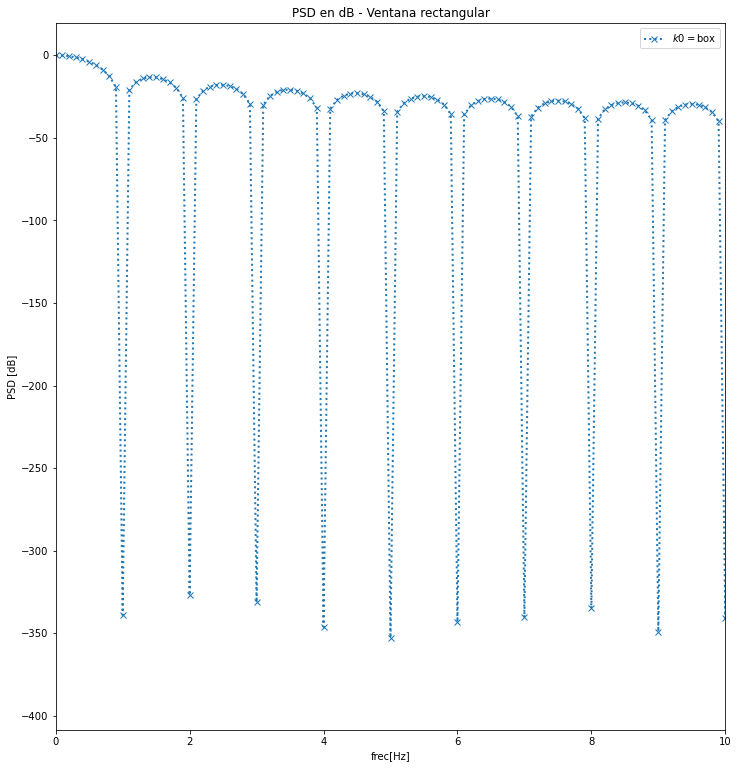

In [7]:
####################################################################
###########        Rectangular             #########################
####################################################################

box = signal.windows.boxcar(N)

plt.figure(1)

plt.plot(t,box)
plt.title("Ventana rectangular")
plt.ylabel("Mag")
plt.xlabel("tiempo [seg]")
axes_hdl = plt.gca()
plt.show()

box_fft = np.abs((1/N)*fft(box, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_box_fft = np.amax(box_fft)
box_fft = box_fft/maxElement_box_fft # Normalizo para que la pot max sea 1 dB

plt.figure(2)

plt.plot(f_pad, 20* np.log10(box_fft),':x', lw=2, label='$ k0 = $' + 'box')
plt.title("PSD en dB - Ventana rectangular")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

### Bartlett ó triangular

La ventana triangular puede expresarse como la convolución de dos ventanas rectangulares 𝑤[𝑘]=rect𝑁[𝑘]∗rect𝑁[𝑘] . El lóbulo principal es más amplio que para la ventana rectangular, pero el nivel de los lóbulos laterales decae más rápidamente.

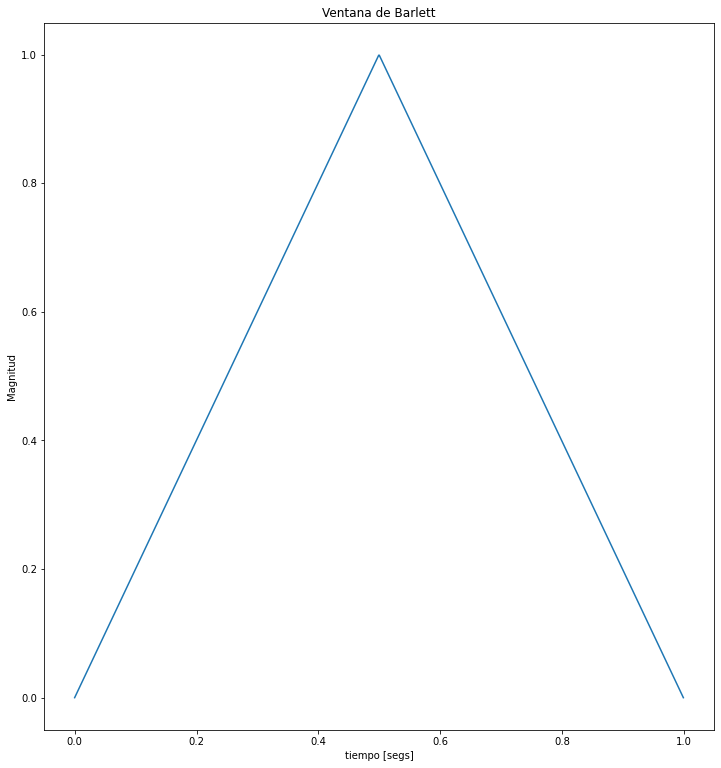

<ipython-input-8-54d95e40f84b>:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(barlett_fft),':x', lw=2, label='$ k0 = $' + 'barlett')


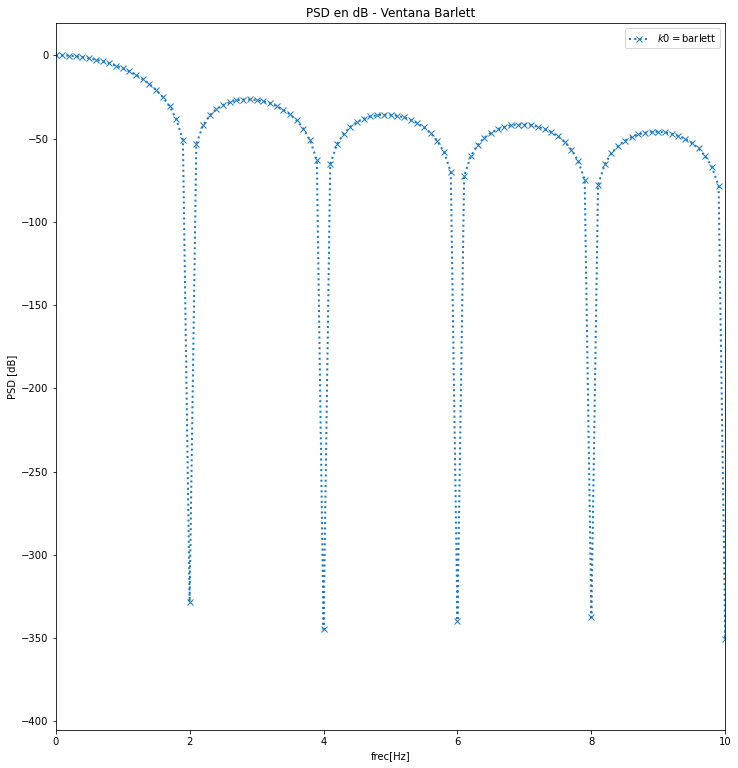

In [8]:
####################################################################
###########        Bartlett ó triangular   #########################
####################################################################

barlett = signal.windows.bartlett(N)

plt.figure(3)

plt.plot(t,barlett)
plt.title("Ventana de Barlett")
plt.ylabel("Magnitud")
plt.xlabel("tiempo [segs]")

axes_hdl = plt.gca()

plt.show()

barlett_fft = np.abs((1/N)*fft(barlett, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_barlett_fft = np.amax(barlett_fft)
barlett_fft = barlett_fft/maxElement_barlett_fft # Normalizo para que la pot max sea 1 dB



plt.figure(4)

plt.plot(f_pad, 20* np.log10(barlett_fft),':x', lw=2, label='$ k0 = $' + 'barlett')
plt.title("PSD en dB - Ventana Barlett")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

### Hann

$w[k] = \frac{1}{2} ( 1 - \cos(2 \pi \frac{k}{N}))$ es una ventana suave cuyo primer y último valor es cero. Presenta un rápido decaimiento de los lóbulos laterales.

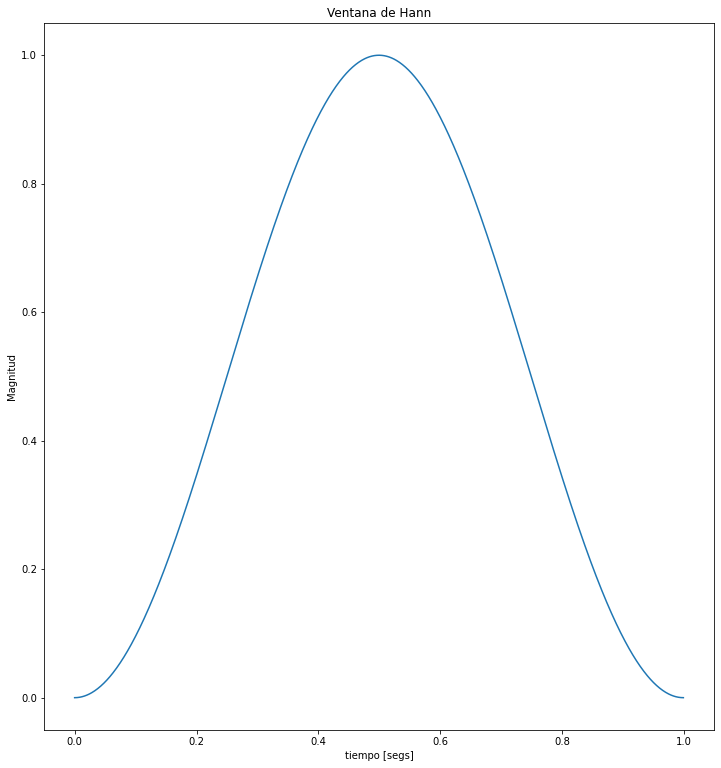

<ipython-input-9-d2e4f82dc2f8>:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(hann_fft),':x', lw=2, label='$ k0 = $' + 'hann')


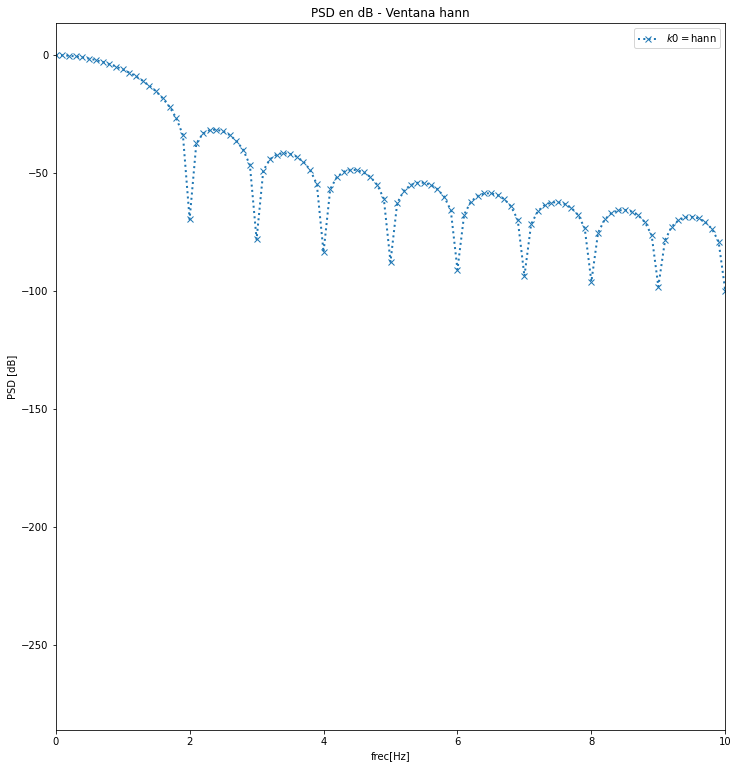

In [9]:
####################################################################
###########        Hann                    #########################
####################################################################

hann = signal.windows.hann(N)

plt.figure(5)

plt.plot(t,hann)
plt.title("Ventana de Hann")
plt.ylabel("Magnitud")
plt.xlabel("tiempo [segs]")
axes_hdl = plt.gca()
plt.show()


hann_fft = np.abs((1/N)*fft(hann, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_hann_fft = np.amax(hann_fft)
hann_fft = hann_fft/maxElement_hann_fft # Normalizo para que la pot max sea 1 dB

plt.figure(6)

plt.plot(f_pad, 20* np.log10(hann_fft),':x', lw=2, label='$ k0 = $' + 'hann')
plt.title("PSD en dB - Ventana hann")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()



### Blackman

$w[k] =  0.42 - 0.5 \cos(2 \pi \frac{k}{N}) + 0.08 \cos(4 \pi \frac{k}{N})$ se caracteriza por un rápido decaimiento de los lóbulos laterales a costa de un lóbulo principal amplio y una selectividad de baja frecuencia.

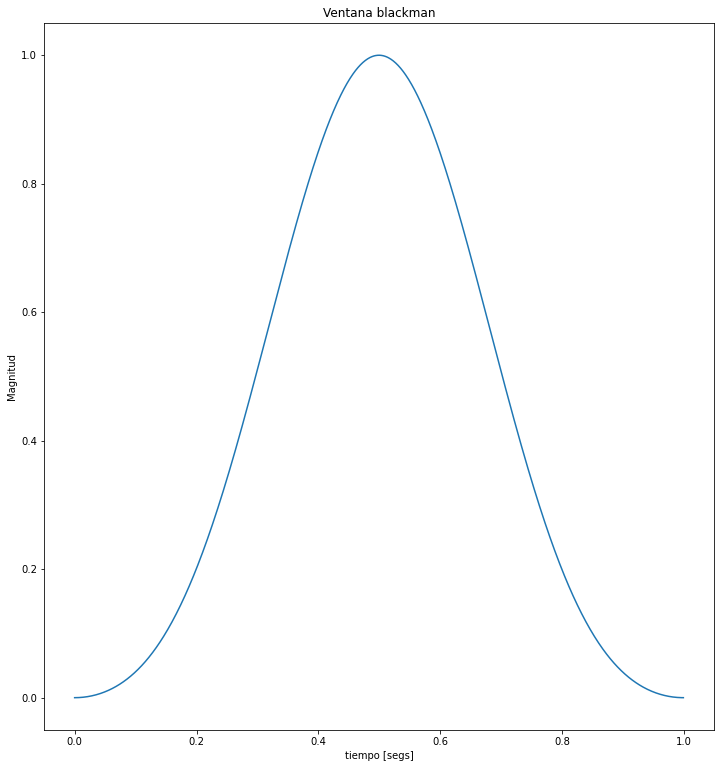

<ipython-input-10-d44d99f151af>:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(blackman_fft),':x', lw=2, label='$ k0 = $' + 'blackman')


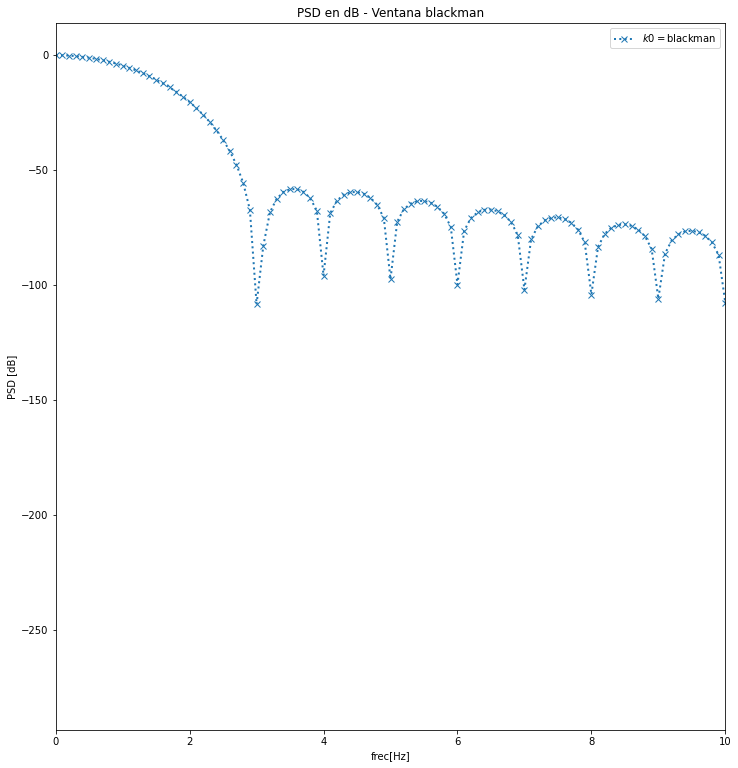

In [10]:
####################################################################
###########        Blackman                #########################
####################################################################

blackman = signal.windows.blackman(N)

plt.figure(7)

plt.plot(t,blackman)
plt.title("Ventana blackman")
plt.ylabel("Magnitud")
plt.xlabel("tiempo [segs]")
axes_hdl = plt.gca()

plt.show()

blackman_fft = np.abs((1/N)*fft(blackman, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_blackman_fft = np.amax(blackman_fft)
blackman_fft = blackman_fft/maxElement_blackman_fft # Normalizo para que la pot max sea 1 dB

plt.figure(8)

plt.plot(f_pad, 20* np.log10(blackman_fft),':x', lw=2, label='$ k0 = $' + 'blackman')
plt.title("PSD en dB - Ventana blackman")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()

### Flat-top

La ventana superior plana también es sinusoidal, pero en realidad cruza la línea del cero. Esto provoca un
un pico mucho más amplio en el dominio de la frecuencia, que está más cerca de la verdadera amplitud de la
señal que con otras ventanas. Esa propiedad es deseable para la medición de amplitudes de componentes de frecuencia senoidales. Los inconvenientes del ancho de banda amplio son la escasa resolución en frecuencia y el elevado Ancho de banda de ruido.

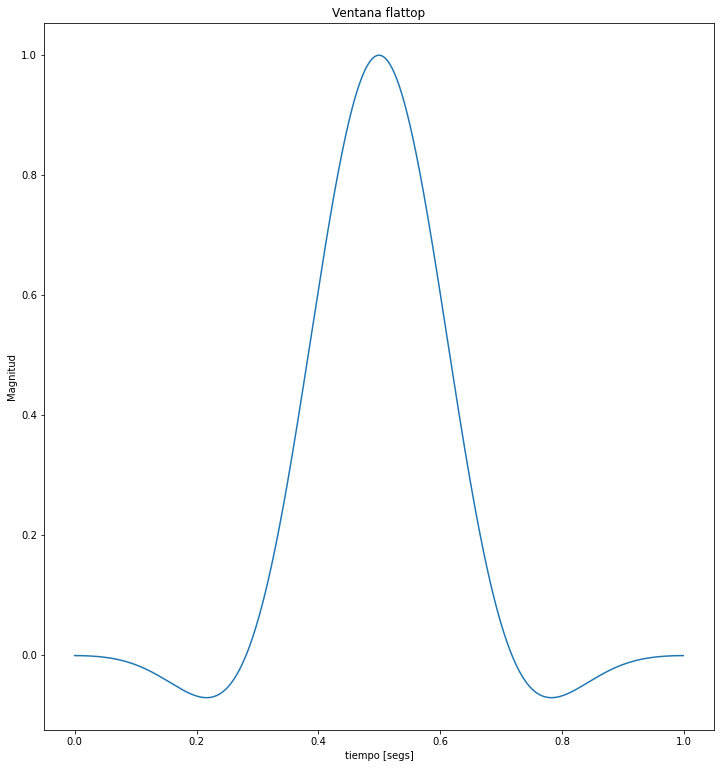

<ipython-input-11-a9d5764389ce>:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_pad, 20* np.log10(flattop_fft),':x', lw=2, label='$ k0 = $' + 'flattop')


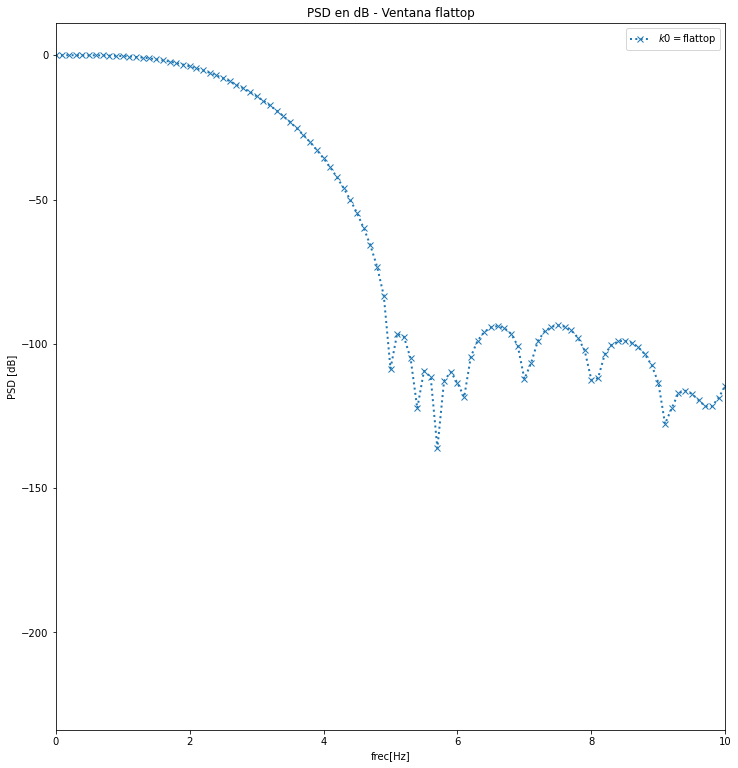

In [11]:
####################################################################
###########        Flat-top                #########################
####################################################################

flattop = signal.windows.flattop(N)

plt.figure(9)

plt.plot(t,flattop)
plt.title("Ventana flattop")
plt.ylabel("Magnitud")
plt.xlabel("tiempo [segs]")
axes_hdl = plt.gca()
plt.show()


flattop_fft = np.abs((1/N)*fft(flattop, n= Npad)) # veo el modulo por eso no debo multiplicar por 2
maxElement_flattop_fft = np.amax(flattop_fft)
flattop_fft = flattop_fft/maxElement_flattop_fft # Normalizo para que la pot max sea 1 dB

plt.figure(10)

plt.plot(f_pad, 20* np.log10(flattop_fft),':x', lw=2, label='$ k0 = $' + 'flattop')
plt.title("PSD en dB - Ventana flattop")
plt.ylabel("PSD [dB]")
plt.xlabel("frec[Hz]")
plt.xlim(0,10)
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

Las distintas funciones de ventana tienen propiedades diferentes. Por ejemplo, con respecto a la capacidad de distinguir dos señales vecinas (resolución de frecuencia) o de detectar dos señales cuando una es mucho más débil (nivel de lóbulos laterales). Dado que estos dos aspectos se contraponen en las funciones de ventana típicas, la elección de una ventana adecuada depende en gran medida de la aplicación. En primer lugar, se examinan las funciones de ventana aplicadas con frecuencia y sus propiedades espectrales. A continuación, se comparan las funciones de ventana mediante las métricas de evaluación más utilizadas.

### Comparación de las funciones ventana

Además de inspeccionar la DTFT de las funciones de ventana, también se utilizan diversas métricas de evaluación para la comparación o selección de las funciones de ventana. Tres de las medidas más destacadas en el análisis espectral son

1. **Amplitud del lóbulo principal**:
La anchura del lóbulo principal en términos de frecuencia normalizada se mide entre los dos puntos en los que su valor máximo se reduce a la mitad (- 3dB). Esta medida está relacionada con la capacidad de detectar dos señales exponenciales con niveles comparables y frecuencias similares.

2. **Amplitud relativa de los lóbulos laterales**:
Relación en términos de amplitud entre el máximo del lóbulo principal y el nivel máximo de los lóbulos laterales. Esta medida está relacionada con el rendimiento de la detección cuando hay dos o más señales exponenciales con niveles dispares y frecuencias disímiles.

3. **Error de muestreo máximo**:
Error de amplitud máxima cuando no se alcanza el máximo del lóbulo principal al muestrear el espectro. Se define como la relación entre la amplitud del lóbulo principal y la amplitud en $\Omega = \frac{\pi}{N}$. Esta medida permite conocer el máximo error posible al extraer la amplitud de las señales armónicas a partir de su DFT.

La siguiente tabla enumera algunos de los valores de estas métricas para las funciones de ventana introducidas

| window function | main lobe width (Δw) | side lobe level (ΔAmax [dB]) 
|---|:---:|:---:|
| [rectangular](#Rectangular-Window) | $\frac{4 \pi}{N}$ | - 13 dB 
| [triangular](#Triangular-Window) | $\frac{8 \pi}{N}$ | - 25 dB 
| [Hann](#Hann-Window) | $\frac{8 \pi}{N}$ | - 31 dB 
| [Hamming](#Hamming-Window) | $\frac{8 \pi}{N}$ | - 41 dB 
| [Blackman](#Blackman-Window) | $\frac{12 \pi}{N}$ | - 57 dB 

De la tabla se desprende que un nivel de lóbulo lateral más bajo tiene como consecuencia un lóbulo principal más amplio.

### Análisis de mezclas de señales mediante la transformación discreta de Fourier con ventanas

Se realizará el análisis de una superposición de dos señales exponenciales:

In [20]:
def dft_signal_mixture_window(N, *, amp1, period1, amp2, period2, window):  
    '''
    N: length of signal/DFT
    amp1, period1 : amplitud and periodicidad de la 1ra exponencial
    amp2, period2 : amplitud and periodicidad de la 2da exponencial
    '''
    Om0_1 = period1 * (2*np.pi/N)  # frequencia de la 1ra señal exponencial 
    Om0_2 = period2 * (2*np.pi/N)  # frequencia de la 2da señal exponencial 
    k = np.arange(N)
    x = amp1 * np.exp(1j*Om0_1*k) + amp2 * np.exp(1j*Om0_2*k)
    x = x * window

    # DFT de la señal mezcla
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot del espectro
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X), basefmt = ' ')
    plt.title(r'Valor absoluto de la DFT de la señal mezclada')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, abs(X).max()+5])
    plt.grid()

Se utilizara una ventana Blackman que presenta una alta supresión de los lóbulos laterales.

<ipython-input-17-e0c72dafdf6a>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(mu, abs(X), basefmt = ' ')


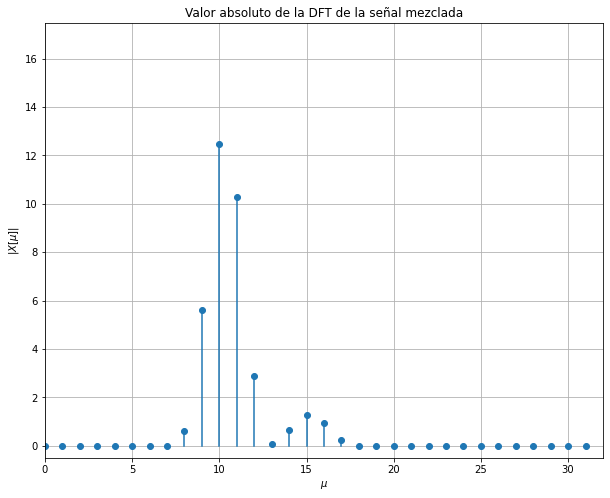

In [18]:
dft_signal_mixture_window(32, amp1=1, period1=10.3, amp2=0.1, period2=15.2, window=np.blackman(32))

Se puede apreciar que el espectro de la segunda señal exponencial con el nivel más bajo es visible.

Haciendo un comparativo de los valores obtenidos en las graficas, analizando los puntos indicados de las diferentes ventanas, podemos realizar la siguiente tabla:

#######################################

| window function | Ω0 | Ω1 | W2 |
|---|:---:|:---:|:---:|
| [rectangular](#Rectangular-Window) | 1 | 0.5 | -12.5 dB |
| [Barlett](#Triangular-Window) | 2 | 0.6 | -26 |
| [Hann](#Hann-Window) | 2 | 0.71 | -31 |
| [Blackman](#Blackman-Window) | 3 | 0.8 | -57.5 |
| [Flat-Top](#Flat-Top-Window) | 5.7 | 1.9 | -92.9 |





Examinando el efecto de las funciones de ventana para diferencias de frecuencia y nivel tanto pequeño como grande, al momento de analizar que función de ventana es la más adecuada para cada situación, se noto que la función de ventana rectangular es muy adecuada para identificar dos o más señales con amplitudes comparables y sólo pequeñas diferencias de frecuencia. Esto se debe a su estrecho lóbulo principal. Las funciones de ventana que presentan un mayor decaimiento de los lóbulos laterales son muy adecuadas para la identificación de señales con niveles y frecuencias bastante diferentes.